## Midterm project: Equity Portfolio Management

### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 

```python
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```


You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.



### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

1. On Jan 02 2018, you split the $\$5m$ into 5 $\$1m$, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was $\$154.25$. With $\$1m$, you can buy max 6482 shares with cost $\$999848.5$ with $\$151.5$‬ cash left. You decided to spend $\$1m$ on each of `['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']` respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is $\$5m$ if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 



4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


8. Download the USD/JPY 2018 historical data at https://finance.yahoo.com/quote/JPY%3DX/history?period1=1514764800&period2=1546300800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need 

# List of functions and variable names

## Functions
- strategy_top_5
    - **input:** day_number
    - **returns** stocks_to_buy[{stock_name : closing_value}]
- buy_stocks
    - **input:** total_cash, stocks_to_buy  
    - **returns** no_of_stocks[{stock name: no_of_stocks_bought}] and remaning_cash i.e remaining cash
- div 
    - **input:** day_number, no_of_stocks
    - **returns** div_cash
- mtm
    - **input:** total_cash, remaning_cash, no_of_stocks
    - **returns** mtm_value[] i.e a list everyday MTM values
- totalCash_afterSell
    - **input:** no_of_stocks[{}], day_number, remaning_cash 
    - **returns** total_cash
- select_strategy
    - **input:** strategy (dtype- string)
    - **returns** stocks_to_buy[{stock_name : closing_value}]
- play --> main function
- init --> define global variables

## Variables
- all_stocks --> **df** of all 10 stocks
- total_cash --> **float** containig total cash
- stocks_to_buy --> **dict** stocks_to_buy[{stock_name : closing_value}]
- day_number --> **int** ranges from 0-250
- no_of_stocks --> **dict** no_of_stocks[{stock name: no_of_stocks_bought}]
- div_cash --> **float** is the value of total dividend
- remaning_cash --> **float** is the value of remaining cash after buying
- mtm_value --> **list** contains daily mtm values
- period --> **int** is the no of days you keep the stocks
- days_batch --> **list** contains list of days when stocks are sold as per the selected strategy


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data for 10 stocks for year 2018

sap=pd.read_csv(r"INTC.csv")
orcl=pd.read_csv(r"ORCL.csv")
nflx=pd.read_csv(r"NFLX.csv")
tsla=pd.read_csv(r"TSLA.csv")
meta=pd.read_csv(r"META.csv")
msft=pd.read_csv(r"MSFT.csv")
aapl=pd.read_csv(r"AAPL.csv")
amzn=pd.read_csv(r"AMZN.csv")
goog=pd.read_csv(r"GOOG.csv")
ibm=pd.read_csv(r"IBM.csv")

In [3]:
# Creating an empty dataset with 20 columns (Close and Adj Close for every company)
all_stocks=pd.DataFrame(columns=['ibm_Close', 'ibm_AdjClose', 'msft_Close','msft_AdjClose', 'goog_Close','goog_AdjClose', 'aapl_Close','aapl_AdjClose', 'amzn_Close', 'amzn_AdjClose', 'meta_Close','meta_AdjClose', 'nflx_Close', 'nflx_AdjClose', 'tsla_Close','tsla_AdjClose', 'orcl_Close','orcl_AdjClose', 'sap_Close','sap_AdjClose'])

In [4]:
stock_list=['ibm', 'msft', 'goog', 'aapl', 'amzn', 'meta', 'nflx', 'tsla', 'orcl', 'sap']

In [5]:
# Populating all_stocks dataset with Close and Adj Close values from 10 companies
all_stocks[['ibm_Close', 'ibm_AdjClose']]=ibm[['Close','Adj Close']] 
all_stocks[['msft_Close', 'msft_AdjClose']]=msft[['Close','Adj Close']] 
all_stocks[['goog_Close', 'goog_AdjClose']]=goog[['Close','Adj Close']] 
all_stocks[['aapl_Close', 'aapl_AdjClose']]=aapl[['Close','Adj Close']] 
all_stocks[['amzn_Close', 'amzn_AdjClose']]=amzn[['Close','Adj Close']] 
all_stocks[['meta_Close', 'meta_AdjClose']]=meta[['Close','Adj Close']] 
all_stocks[['nflx_Close', 'nflx_AdjClose']]=nflx[['Close','Adj Close']] 
all_stocks[['tsla_Close', 'tsla_AdjClose']]=tsla[['Close','Adj Close']] 
all_stocks[['orcl_Close', 'orcl_AdjClose']]=orcl[['Close','Adj Close']] 
all_stocks[['sap_Close', 'sap_AdjClose']]=sap[['Close','Adj Close']] 

all_stocks.head()

,ibm_Close,ibm_AdjClose,msft_Close,msft_AdjClose,goog_Close,goog_AdjClose,aapl_Close,aapl_AdjClose,amzn_Close,amzn_AdjClose,meta_Close,meta_AdjClose,nflx_Close,nflx_AdjClose,tsla_Close,tsla_AdjClose,orcl_Close,orcl_AdjClose,sap_Close,sap_AdjClose
0,147.466537,109.547668,85.949997,80.229004,53.250000,53.250000,43.064999,40.670979,59.450500,59.450500,181.419998,181.419998,201.070007,201.070007,21.368668,21.368668,46.630001,42.119247,46.849998,39.740639
1,151.520081,112.558922,86.349998,80.602394,54.124001,54.124001,43.057499,40.663887,60.209999,60.209999,184.669998,184.669998,205.050003,205.050003,21.150000,21.150000,47.709999,43.094761,45.259998,38.391922
2,154.588913,114.838615,87.110001,81.311806,54.320000,54.320000,43.257500,40.852772,60.479500,60.479500,184.330002,184.330002,205.630005,205.630005,20.974667,20.974667,48.180000,43.519299,44.430000,37.687874
3,155.344162,115.399712,88.190002,82.319923,55.111500,55.111500,43.750000,41.317902,61.457001,61.457001,186.850006,186.850006,209.990005,209.990005,21.105333,21.105333,48.470001,43.781242,44.740002,37.950840
4,156.281067,116.095680,88.279999,82.403946,55.347000,55.347000,43.587502,41.164436,62.343498,62.343498,188.279999,188.279999,212.050003,212.050003,22.427334,22.427334,48.980000,44.241917,44.740002,37.950840


### Finding the Top 5 Stocks every 5th Day

In [6]:
# Creating a list of days - days_batch, when stocks are sold as per the strategy

period=int(input("Enter after how many days do you wish to sell the stocks. Enter number between 1 & 249:" ))
days_batch=np.arange(0,len(all_stocks)+1,period)
days_batch=days_batch-1
days_batch[0]=days_batch[0]+1
days_batch

array([  0,   4,   9,  14,  19,  24,  29,  34,  39,  44,  49,  54,  59,
        64,  69,  74,  79,  84,  89,  94,  99, 104, 109, 114, 119, 124,
       129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189,
       194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249])

In [7]:
# Creating two Lists with Close & AdjClose Column Names 
import re
Close_columns=[]
AdjClose_columns=[]
for i in all_stocks.columns:
    if 'Adj' not in i:
        Close_columns.append(i)
    else:
        AdjClose_columns.append(i)
        
print(Close_columns)
print(AdjClose_columns)

['ibm_Close', 'msft_Close', 'goog_Close', 'aapl_Close', 'amzn_Close', 'meta_Close', 'nflx_Close', 'tsla_Close', 'orcl_Close', 'sap_Close']
['ibm_AdjClose', 'msft_AdjClose', 'goog_AdjClose', 'aapl_AdjClose', 'amzn_AdjClose', 'meta_AdjClose', 'nflx_AdjClose', 'tsla_AdjClose', 'orcl_AdjClose', 'sap_AdjClose']


In [8]:
# Create a function to calculate the top 5 stocks at the end of a given day.
# The function will retrun the Stock name and the corresponding Closing Value.

def strategy_top_5(day_number):
    top_5=all_stocks.loc[day_number,Close_columns].sort_values(ascending=False)[:5]
    stocks_to_buy=top_5.to_dict()
    return stocks_to_buy

In [9]:
CloseValue=strategy_top_5(days_batch[0])
print(f"Closing Value:\n{CloseValue}")
print(type(CloseValue))


Closing Value:
{'nflx_Close': 201.070007, 'meta_Close': 181.419998, 'ibm_Close': 147.466537, 'msft_Close': 85.949997, 'amzn_Close': 59.4505}
<class 'dict'>


In [10]:
# for i,j in zip(CloseValue.index,CloseValue.values):
#     print(i,j)
#CloseValue.index[0], CloseValue.values[0]

In [11]:
# Create a function to calculate the Number of Stocks to be purchased
# Calculate the remaning cash after purchasing stocks 

def buy_stocks(stocks_to_buy,total_cash):
    # Divide total_cash into 5 equal parts
    no_of_stocks={}
    cash_bucket_per_stock=total_cash/5
    remaning_cash=0
    for i,j in stocks_to_buy.items():
        no_of_stocks[i]=round(cash_bucket_per_stock//j)
        remaning_cash=remaning_cash+(cash_bucket_per_stock%j)
    return no_of_stocks,remaning_cash


In [12]:
# Create a function to calculate the total_cash after selling the stocks on a given day

def totalCash_afterSell(no_of_stocks,day_number,remaning_cash):
    for share,num_of_shares in no_of_stocks.items():
        remaning_cash=remaning_cash+all_stocks[share][day_number]*num_of_shares
    total_cash=remaning_cash
    return total_cash

    

In [13]:
# #for day in days_batch:
# for day_number in days_batch:
#     # Get the top 5 stocks with the closing price on a given day
#     stocks_to_buy=strategy_top_5(day_number)
    
#     # Calulate the number of stocks to buy for each stock & remaning cash
#     if day_number==0:
#         total_cash=5000000
#         no_of_stocks,remaning_cash=buy_stocks(stocks_to_buy,total_cash)
#     elif day_number<250:
#         total_cash=totalCash_afterSell(no_of_stocks,day_number,remaning_cash)
#         no_of_stocks,remaning_cash=buy_stocks(stocks_to_buy,total_cash)
#     else:
#         total_cash=totalCash_afterSell(no_of_stocks,day_number,remaning_cash)
    
# print(f"Total Cash generated after 10 days is: {total_cash}")
        

In [14]:
# Create a function to determine the stocks which had the maximum percentage drop

def max_StockChange(past_day,current_day,change):
    """ This function takes the last batch day and current batch day as input and 
        calculates the max % drop in shareprice between the two days"""
    
    # Calculate % drop in share prices previous batch day and current day
    AdjClose_percent_Diff={}
    for i in AdjClose_columns:
        if change=='drop':
            AdjClose_percent_Diff[i]=[(all_stocks[i][past_day]-all_stocks[i][current_day])/((all_stocks[i][past_day]+all_stocks[i][current_day])/2),all_stocks[i][current_day]]
        else:
            AdjClose_percent_Diff[i]=[(-all_stocks[i][past_day]+all_stocks[i][current_day])/((all_stocks[i][past_day]+all_stocks[i][current_day])/2),all_stocks[i][current_day]]
            
    # Sort the shares with highest % drop in share prices
    max_change=sorted(AdjClose_percent_Diff.items(), key=lambda x:x[1])[:5]

    return max_change



In [15]:
print(max_StockChange(0,4,'drop'))
max_change=max_StockChange(0,4,'drop')

[('ibm_AdjClose', [-0.05803859992362815, 116.09568]), ('nflx_AdjClose', [-0.053156447202835806, 212.050003]), ('orcl_AdjClose', [-0.04915797568453337, 44.241917]), ('tsla_AdjClose', [-0.0483453261327369, 22.427334]), ('amzn_AdjClose', [-0.04750641324706328, 62.343498])]


In [16]:
# Create a function to determine the Stocks which need to be purchased and their closing value

def stocks_toPurchase(max_change,current_day):
    """ This function returns the stocks which need to be purchased
    and their closing value"""
    
    # Extracting the Column name and Closing price of the stock to be purchased
    adj_5=[]
    for i in range(len(max_change)):
        adj_5.append(max_change[i][0])
        adj_5
    x=[]
    for i in range(5):
        x.append(adj_5[i][:-8])
        
    stocks_to_purchase={}
    for i in Close_columns:
        if i[:-5] in x:
            #print(i)
            stocks_to_purchase[i]=all_stocks[i][current_day]
        #print(i, all_stocks[i][4])
    return stocks_to_purchase

In [17]:
print(stocks_toPurchase(max_change,4))

{'ibm_Close': 156.281067, 'amzn_Close': 62.343498, 'nflx_Close': 212.050003, 'tsla_Close': 22.427334, 'orcl_Close': 48.98}


In [18]:
def select_strategy(strategy,day_number):
    if strategy=='strategy1':
        # This strategy selects the top 5 stocks with highest closing price on the given day
        return strategy_top_5(day_number)
        
    if strategy=='strategy2':
        # This strategy selects 5 shares who had the highest percentage drop in Adj_Close value for a given period of days
        max_5_drops=max_StockChange(day_number-(period-1),day_number,'drop')
        stocks_to_buy=stocks_toPurchase(max_5_drops,day_number)
        return stocks_to_buy
    if strategy=='strategy3':
        # This strategy selects 5 shares who had the highest percentage rise in Adj_Close value for a given period of days
        max_5_rise=max_StockChange(day_number-(period-1),day_number,'rise')
        stocks_to_buy=stocks_toPurchase(max_5_rise,day_number)
        return stocks_to_buy    
        
    

In [19]:
# no_of_stocksN = {"ibm_Close": 4000,
#                 "msft_Close": 3000,
#                 "goog_Close": 400}

def get_stock_prefixes(stock_dict):
    prefixes = []
    for key in stock_dict.keys():
        prefix = key.split('_')[0] + '_'
        prefixes.append(prefix)
    return prefixes

#result = get_stock_prefixes(no_of_stocks)
#print(result)

In [20]:
#def check_Dividend(number_of_shares,)
def div(day, no_of_stocks, remaning_cash):
    stocks_adj = {}
    stocks_close = {}
    pri = get_stock_prefixes(no_of_stocks)
    k = 0
#     rem_cash = 0
    for i in no_of_stocks:
#         stocks_close[i] = all_stocks[i][day]
#         stocks_adj[i] = all_stocks[pri[k]+'AdjClose'][day]
#         print(stocks_close)
#         print(stocks_adj)
        cpRatio = all_stocks[i][day-1]/all_stocks[i][day]
        adjRatio = all_stocks[pri[k]+'AdjClose'][day-1]/all_stocks[pri[k]+'AdjClose'][day]
        diff = np.abs(cpRatio - adjRatio)
        if diff > 0.0001:
            #print(remaning_cash)
            div_for_1_stock = diff*all_stocks[i][day]
            remaning_cash = remaning_cash + (div_for_1_stock*no_of_stocks[i])
            #print(diff*all_stocks[i][day])
            #print(remaning_cash)
        k+=1
    return remaning_cash
#print(div(26,no_of_stocks,5000))

In [21]:

# #for day in days_batch:
# for day_number in days_batch:
#     # Get the top 5 stocks with the closing price on a given day
#     stocks_to_buy=strategy_top_5(day_number)
    
#     # Calulate the number of stocks to buy for each stock & remaning cash
#     if day_number==0:
#         total_cash=5000000
#         no_of_stocks,remaning_cash=buy_stocks(stocks_to_buy,total_cash)
#     else:
#         total_cash=totalCash_afterSell(no_of_stocks,day_number,remaning_cash)
#         stocks_to_buy=select_strategy(strategy,day_number)
#         no_of_stocks,remaning_cash=buy_stocks(stocks_to_buy,total_cash)
    
# total_cash=totalCash_afterSell(no_of_stocks,249,remaning_cash)  
# print(f"Total Cash generated on last day of 2018 with {strategy} is: {total_cash}")

In [22]:
def mtm(mtm_values,total_cash, remaining_cash, no_of_stocks,day):
    """
    Calculate the Mark-to-Market (MTM) value of the portfolio.

    Parameters:
    total_cash (float): Total cash available in the portfolio.
    remaining_cash (float): Remaining cash after buying stocks.
    no_of_stocks (dict): Dictionary containing the number of stocks owned.
    close_values (dict): Dictionary containing the closing values of stocks.

    Returns:
    list: A list containing the daily MTM values.
    """
    

    # Calculate total value of cash and stocks
    total_value = remaining_cash
    for stock, num_shares in no_of_stocks.items():
        total_value += num_shares * all_stocks[stock][day]

    # Append the calculated MTM value to the list
    mtm_values.append(total_value)
    #print(mtm_values)

    return mtm_values

In [23]:
def calculate_high_tech_index():
      # Calculate daily average of the 10 stocks' "Close" prices
    all_stocks['high_tech_index'] = all_stocks[Close_columns].mean(axis='columns')
calculate_high_tech_index()   
all_stocks.head()
    



,ibm_Close,ibm_AdjClose,msft_Close,msft_AdjClose,goog_Close,goog_AdjClose,aapl_Close,aapl_AdjClose,amzn_Close,amzn_AdjClose,...,meta_AdjClose,nflx_Close,nflx_AdjClose,tsla_Close,tsla_AdjClose,orcl_Close,orcl_AdjClose,sap_Close,sap_AdjClose,high_tech_index
0,147.466537,109.547668,85.949997,80.229004,53.250000,53.250000,43.064999,40.670979,59.450500,59.450500,...,181.419998,201.070007,201.070007,21.368668,21.368668,46.630001,42.119247,46.849998,39.740639,88.652070
1,151.520081,112.558922,86.349998,80.602394,54.124001,54.124001,43.057499,40.663887,60.209999,60.209999,...,184.669998,205.050003,205.050003,21.150000,21.150000,47.709999,43.094761,45.259998,38.391922,89.910158
2,154.588913,114.838615,87.110001,81.311806,54.320000,54.320000,43.257500,40.852772,60.479500,60.479500,...,184.330002,205.630005,205.630005,20.974667,20.974667,48.180000,43.519299,44.430000,37.687874,90.330059
3,155.344162,115.399712,88.190002,82.319923,55.111500,55.111500,43.750000,41.317902,61.457001,61.457001,...,186.850006,209.990005,209.990005,21.105333,21.105333,48.470001,43.781242,44.740002,37.950840,91.500801
4,156.281067,116.095680,88.279999,82.403946,55.347000,55.347000,43.587502,41.164436,62.343498,62.343498,...,188.279999,212.050003,212.050003,22.427334,22.427334,48.980000,44.241917,44.740002,37.950840,92.231640


In [24]:
# for i in range(len(all_stocks)):
#     print((all_stocks['mtm_values'][i] - all_stocks['mtm_values'][0])/all_stocks['mtm_values'][0] * 100)
#     print((all_stocks['high_tech_index'][i] - all_stocks['high_tech_index'][0])/all_stocks['high_tech_index'][0] * 100)

In [25]:
def plot_mtm_vs_high_tech_index():
    
    
    mtm_percentage_change = []
    high_tech_index_percentage_change = []
    # Convert both series to daily percentage change with respect to Jan 02, 2018
    for i in range(len(all_stocks)):
        mtm_percentage_change.append((all_stocks['mtm_values'][i] - all_stocks['mtm_values'][0])/all_stocks['mtm_values'][0] * 100) 
        high_tech_index_percentage_change.append((all_stocks['high_tech_index'][i] - all_stocks['high_tech_index'][0])/all_stocks['high_tech_index'][0] * 100)
    
    all_stocks['mtm_percentage_change'] = mtm_percentage_change
    all_stocks['high_tech_index_percentage_change'] = high_tech_index_percentage_change
    plt.figure(figsize=(10, 6))
    
#     all_stocks.plot(x=index,y=['high_tech_index',''])
    plt.plot(all_stocks.index,all_stocks['high_tech_index_percentage_change'], label='High Tech Index')
    plt.plot(all_stocks.index,all_stocks['mtm_percentage_change'], label='MTM Values')
    #plt.plot(all_stocks.index,mtm)
    
#     plt.plot(mtm_percentage_change, label='MTM')
#     plt.plot(high_tech_index_percentage_change, label='High Tech Index')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.title('MTM vs High Tech Index')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:

def stock_analysis():
    mtm_value=[]
    days=np.arange(0,250)
    strategy=input("Enter on of the following strategies - strategy1 , strategy2, or strategy3: " )
    for day_number in days:
        if day_number==0:
            total_cash=5000000
            stocks_to_buy=strategy_top_5(day_number)
            no_of_stocks,remaning_cash=buy_stocks(stocks_to_buy,total_cash)
            day_number += 1
        
        remaning_cash=div(day_number, no_of_stocks, remaning_cash)
        
        if day_number!=0 and day_number in days_batch:
            total_cash=totalCash_afterSell(no_of_stocks,day_number,remaning_cash)
            stocks_to_buy=select_strategy(strategy,day_number)
            no_of_stocks,remaning_cash=buy_stocks(stocks_to_buy,total_cash)
        mtm_values=mtm(mtm_value,total_cash, remaning_cash, no_of_stocks,day_number)
        
    #print(f"MTM: {mtm_value}, {len(mtm_value)}")
    print(f"Total Cash:{total_cash}")
    all_stocks['mtm_values'] = mtm_values

 
    plot_mtm_vs_high_tech_index()
    


Total Cash:5159291.568143288


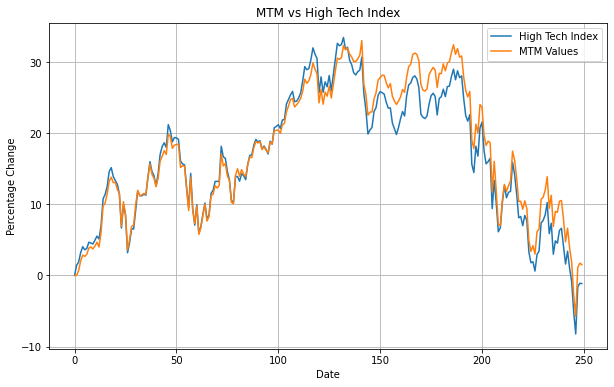

In [27]:
stock_analysis()

In [28]:
all_stocks.head()

,ibm_Close,ibm_AdjClose,msft_Close,msft_AdjClose,goog_Close,goog_AdjClose,aapl_Close,aapl_AdjClose,amzn_Close,amzn_AdjClose,...,tsla_Close,tsla_AdjClose,orcl_Close,orcl_AdjClose,sap_Close,sap_AdjClose,high_tech_index,mtm_values,mtm_percentage_change,high_tech_index_percentage_change
0,147.466537,109.547668,85.949997,80.229004,53.250000,53.250000,43.064999,40.670979,59.450500,59.450500,...,21.368668,21.368668,46.630001,42.119247,46.849998,39.740639,88.652070,5.082622e+06,0.000000,0.000000
1,151.520081,112.558922,86.349998,80.602394,54.124001,54.124001,43.057499,40.663887,60.209999,60.209999,...,21.150000,21.150000,47.709999,43.094761,45.259998,38.391922,89.910158,5.082622e+06,0.000000,1.419129
2,154.588913,114.838615,87.110001,81.311806,54.320000,54.320000,43.257500,40.852772,60.479500,60.479500,...,20.974667,20.974667,48.180000,43.519299,44.430000,37.687874,90.330059,5.117817e+06,0.692456,1.892780
3,155.344162,115.399712,88.190002,82.319923,55.111500,55.111500,43.750000,41.317902,61.457001,61.457001,...,21.105333,21.105333,48.470001,43.781242,44.740002,37.950840,91.500801,5.187517e+06,2.063799,3.213383
4,156.281067,116.095680,88.279999,82.403946,55.347000,55.347000,43.587502,41.164436,62.343498,62.343498,...,22.427334,22.427334,48.980000,44.241917,44.740002,37.950840,92.231640,5.227955e+06,2.859403,4.037774


In [29]:
jpy= pd.read_csv("jpy.csv")

ccc = jpy[jpy['Date'].isin(ibm['Date'])]

jpyc = ccc['Close']

all_stocks['jpy_mtm'] = all_stocks['mtm_values']*jpyc.values

In [30]:
def plot_mtm_jpy():
    
    
    jpy_mtm = []
    mtm_n = []
    # Convert both series to daily percentage change with respect to Jan 02, 2018
    for i in range(len(all_stocks)):
        jpy_mtm.append((all_stocks['jpy_mtm'][i] - all_stocks['jpy_mtm'][0])/all_stocks['jpy_mtm'][0] * 100) 
        mtm_n.append((all_stocks['mtm_values'][i] - all_stocks['mtm_values'][0])/all_stocks['mtm_values'][0] * 100)
    
    all_stocks['jpy_mtm_change'] = jpy_mtm
    all_stocks['mtm_n'] = mtm_n
    plt.figure(figsize=(10, 6))
    
    plt.plot(all_stocks.index,all_stocks['mtm_n'], label='MTM Values')
    plt.plot(all_stocks.index,all_stocks['jpy_mtm_change'], label='JPY MTM Values')

    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.title('JPY MTM vs MTM')
    plt.legend()
    plt.grid(True)
    plt.show()

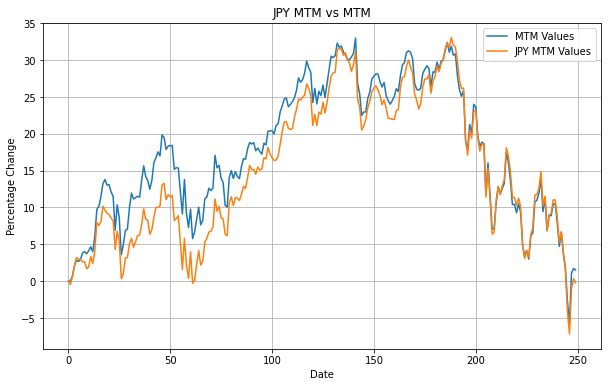

In [31]:
plot_mtm_jpy()